In [11]:
#loading the reduced dataset
df_train = pd.read_csv("train_small.csv")
df_test = pd.read_csv("test_small.csv")

In [12]:
df_train.shape,df_test.shape

((100000, 3), (10000, 3))

In [22]:
# Define features (X) and labels (y)
X = df_train["clean_review"]     # input text
y = df_train["label"]            # sentiment label (1=neg, 2=pos)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_val.shape

((80000,), (20000,))

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=50000,      # limit vocabulary for laptop
    ngram_range=(1,2),       # unigrams + bigrams
    min_df=5                 # remove rare words
)

# Fit only on training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform validation + test
X_val_tfidf   = tfidf.transform(X_val)
X_test_tfidf  = tfidf.transform(df_test["clean_review"])

In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_val_pred = log_reg.predict(X_val_tfidf)

# Accuracy
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Detailed evaluation
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, target_names=["negative", "positive"]))

Validation Accuracy: 0.89095

Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.89      0.89     10000
    positive       0.89      0.89      0.89     10000

    accuracy                           0.89     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.89      0.89      0.89     20000



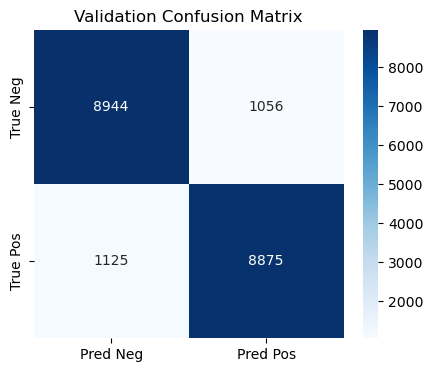

In [27]:
cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=["Pred Neg", "Pred Pos"],
            yticklabels=["True Neg", "True Pos"])
plt.title("Validation Confusion Matrix")
plt.show()

In [28]:
y_test_pred = log_reg.predict(X_test_tfidf)

print("Test Accuracy:", accuracy_score(df_test["label"], y_test_pred))

print("\nTest Classification Report:")
print(classification_report(df_test["label"], y_test_pred,
                            target_names=["negative", "positive"]))

Test Accuracy: 0.894

Test Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.89      0.89      4972
    positive       0.89      0.90      0.89      5028

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [29]:
import joblib

joblib.dump(log_reg, "logreg_tfidf_model.joblib")
joblib.dump(tfidf, "tfidf_vectorizer.joblib")

['tfidf_vectorizer.joblib']

In [30]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC()

svm_clf.fit(X_train_tfidf, y_train)

/Users/varsharavi/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on validation set
y_val_pred_svm = svm_clf.predict(X_val_tfidf)

val_acc_svm = accuracy_score(y_val, y_val_pred_svm)
print("Validation Accuracy (SVM):", val_acc_svm)

print("\nValidation Classification Report (SVM):")
print(classification_report(y_val, y_val_pred_svm, target_names=["negative", "positive"]))

Validation Accuracy (SVM): 0.8899

Validation Classification Report (SVM):
              precision    recall  f1-score   support

    negative       0.89      0.89      0.89     10000
    positive       0.89      0.89      0.89     10000

    accuracy                           0.89     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.89      0.89      0.89     20000



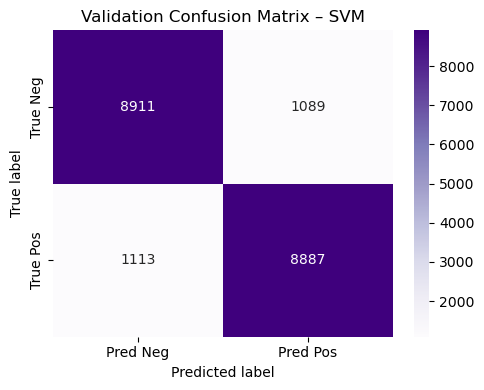

In [32]:
cm_val_svm = confusion_matrix(y_val, y_val_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm_val_svm, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Pred Neg", "Pred Pos"],
            yticklabels=["True Neg", "True Pos"])
plt.title("Validation Confusion Matrix – SVM")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

In [33]:
import joblib

joblib.dump(svm_clf, "svm_tfidf_model.joblib")

['svm_tfidf_model.joblib']